In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta a la carpeta con resultados
results_dir = "results_docker_github"

# Cargar todos los archivos JSON de resultados
data = {}
for filename in os.listdir(results_dir):
    if filename.endswith(".json"):
        with open(os.path.join(results_dir, filename)) as f:
            data[filename] = json.load(f)

# Mostrar los archivos cargados
print(f"Archivos cargados: {list(data.keys())}")


Archivos cargados: ['results_docker_20250523_231628.json', 'results_docker_20250523_231715.json', 'results_docker_20250523_231802.json', 'results_docker_20250523_231849.json', 'results_docker_20250523_231935.json', 'results_docker_20250523_232021.json', 'results_docker_20250523_232108.json', 'results_docker_20250523_232154.json', 'results_docker_20250523_232241.json', 'results_docker_20250523_232327.json', 'results_docker_20250523_232414.json', 'results_docker_20250523_232500.json', 'results_docker_20250523_232547.json', 'results_docker_20250523_232635.json', 'results_docker_20250523_232720.json', 'results_docker_20250523_232806.json', 'results_docker_20250523_232854.json', 'results_docker_20250523_232941.json', 'results_docker_20250523_233027.json', 'results_docker_20250523_233113.json']


In [2]:
# Convertir los resultados a un DataFrame
rows = []
for file, tests in data.items():
    source = "docker" if "docker" in file.lower() else "vm"
    for test_name, result in tests.items():
        if "error" not in result:
            rows.append({
                "source": source,
                "file": file,
                "test": test_name,
                "cpu": result["cpu"],
                "memory": result["memory"],
                "time": result["time"]
            })

df = pd.DataFrame(rows)
df.head()


,source,file,test,cpu,memory,time
0,docker,results_docker_20250523_231628.json,idle,13.020000,271.769531,5.000097
1,docker,results_docker_20250523_231628.json,cpu_stress,91.281818,50.792969,5.010782
2,docker,results_docker_20250523_231628.json,cpu_multi,99.800000,77.855469,5.010294
3,docker,results_docker_20250523_231628.json,memory_stress,97.481818,1042.148438,5.095571
4,docker,results_docker_20250523_231628.json,memory_large,10.112500,13.332031,4.000255


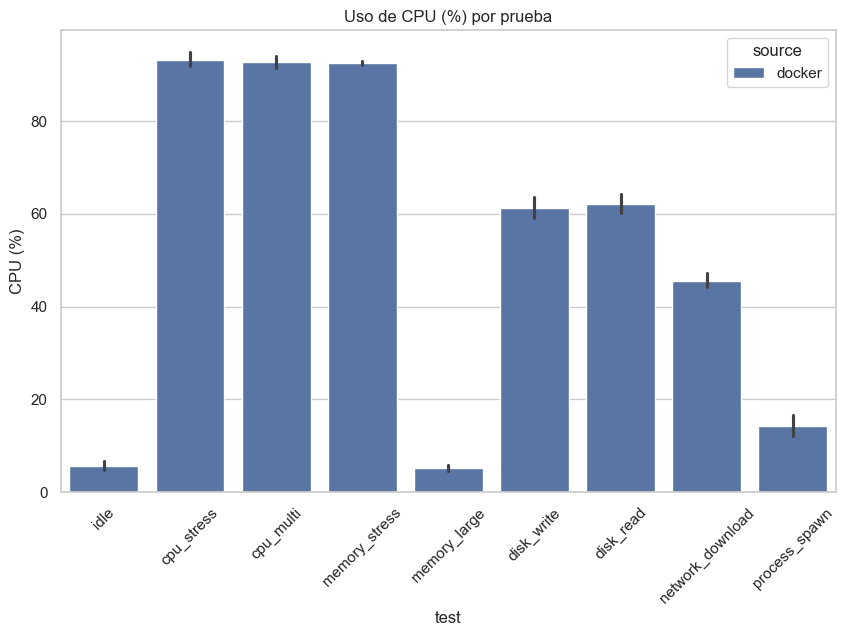

In [3]:
plt.figure()
sns.barplot(data=df, x="test", y="cpu", hue="source")
plt.title("Uso de CPU (%) por prueba")
plt.xticks(rotation=45)
plt.ylabel("CPU (%)")
plt.show()


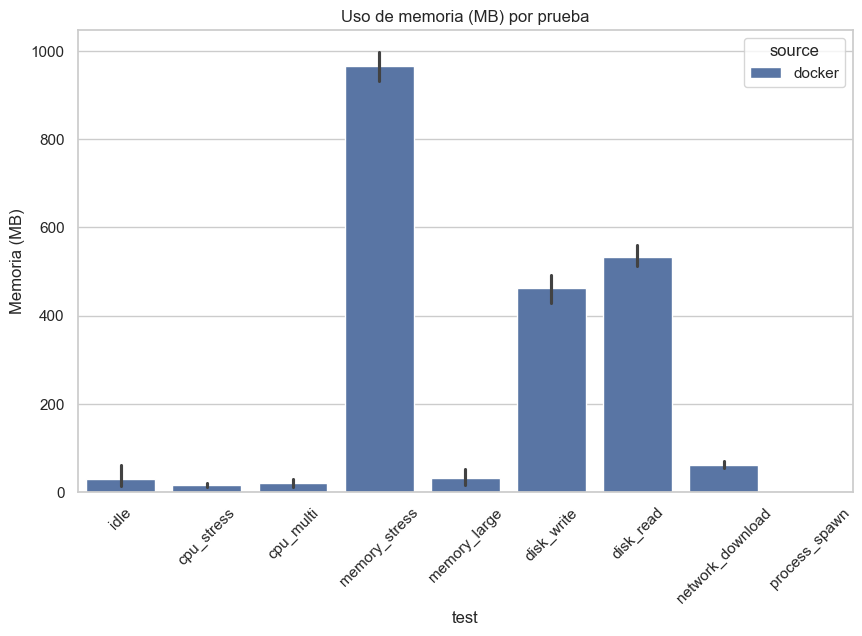

In [4]:
plt.figure()
sns.barplot(data=df, x="test", y="memory", hue="source")
plt.title("Uso de memoria (MB) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Memoria (MB)")
plt.show()


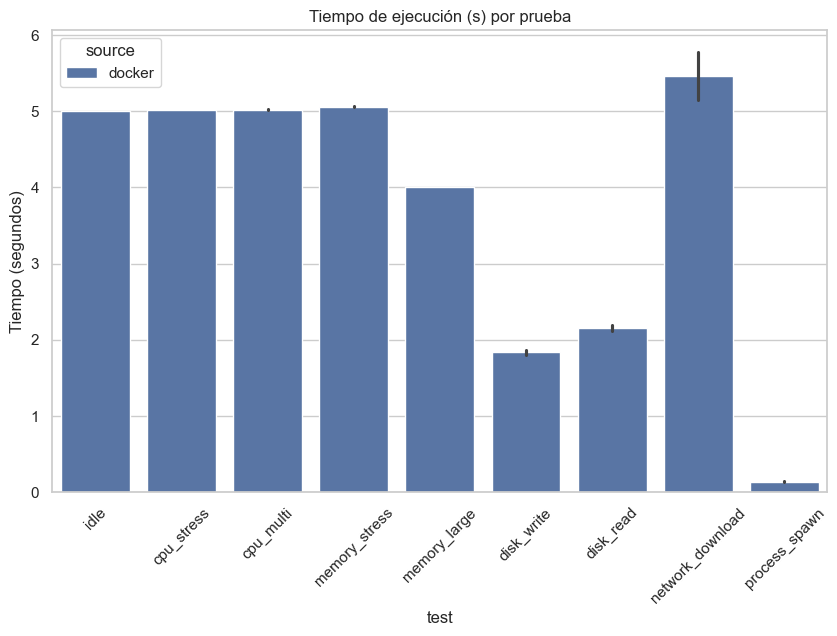

In [5]:
plt.figure()
sns.barplot(data=df, x="test", y="time", hue="source")
plt.title("Tiempo de ejecución (s) por prueba")
plt.xticks(rotation=45)
plt.ylabel("Tiempo (segundos)")
plt.show()


In [6]:
summary = df.groupby(["source", "test"]).agg(
    cpu_mean=("cpu", "mean"),
    cpu_std=("cpu", "std"),
    memory_mean=("memory", "mean"),
    memory_std=("memory", "std"),
    time_mean=("time", "mean"),
    time_std=("time", "std")
).reset_index()

summary


,source,test,cpu_mean,cpu_std,memory_mean,memory_std,time_mean,time_std
0,docker,cpu_multi,92.674091,3.135900,20.052344,21.357733,5.015391,0.021904
1,docker,cpu_stress,93.160455,3.476025,16.245508,11.682203,5.010877,0.001860
2,docker,disk_read,62.201500,4.723162,533.497266,60.938305,2.150863,0.102113
3,docker,disk_write,61.303750,5.435920,462.627930,76.975854,1.835993,0.073185
4,docker,idle,5.704000,2.288239,30.837500,58.242353,5.000094,0.000015
5,docker,memory_large,5.170625,1.695045,31.208594,49.976778,4.000280,0.000047
6,docker,memory_stress,92.440455,1.300378,965.580859,78.954322,5.058512,0.010614
7,docker,network_download,45.581390,3.532260,62.011719,17.825552,5.466384,0.718809
8,docker,process_spawn,14.190000,5.636619,0.000000,0.000000,0.139621,0.003516
